# Introduction

This project is compatible with `CRISPDM (Cross-Industry Standard Process For Data Mining)` methodology. Consequently it's structure will consists of the following parts:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modeling
5. Results

## 1. Business Understanding

In this project I have decided to take a closer look at [Dota 2](http://blog.dota2.com/) professional scene. It is most played game on [Steam](https://steamcommunity.com/) and takes [7th place in the ranking of most played games in the world](https://newzoo.com/insights/rankings/top-20-core-pc-games/?source=post_page---------------------------).

As a former pro-aiming player I am interested how the scene has changed in last 7 years since the time when I was active. I would like to find answers to the following questions:

1. How is the game doing? Is the game losing popularity? 
2. How many players are there? What part of them plays ranked matches? How many of them are professional players?
3. What is average MMR (Match Making Ranking) of common Dota 2 player?
4. What is average division of common Dota 2 player?
5. How does professional player performance compare to average player?
6. How much professional players can earn from winning tournaments?




## 2. Data Understanding

In this part I will perform whole ETL process of fetching, transforming and loading data that will be used to answer business questions.

---

Fetching data from https://www.opendota.com/ about current pro dota scene.

Using free api access (no api-key needed) with 50000 calls per month and 60 calls per minute available. 

More info at: https://www.opendota.com/api-keys.


### Import

In [1]:
import pandas as pd 
import numpy as np

from project.api.Endpoint import (
    ENDPOINT_GET_PRO_PLAYER_LIST,
    ENDPOINT_GET_PRO_TEAM_LIST,
    ENDPOINT_GET_PLAYER_INFO,
    ENDPOINT_GET_PRO_TEAM_PLAYER_LIST,
    ENDPOINT_GET_PLAYER_MMR_DISTRIBUTION
)

from project.data.Scrapping import fetch_data_from_endpoint
from project.data.Generation import rank_name_generator
from project.data.Parsing import (
    dict_to_dataframe,
    dict_list_to_dataframe,
    steamcharts_to_dataframe,
    account_ids_player_details_to_mmr_dict
)

### Downloading raw json data

- pro player list

In [2]:
json_pro_player_list = fetch_data_from_endpoint(ENDPOINT_GET_PRO_PLAYER_LIST)

Fetching data from: https://api.opendota.com/api/proPlayers
Success!


- professional team list

In [3]:
json_pro_team_list = fetch_data_from_endpoint(ENDPOINT_GET_PRO_TEAM_LIST)

Fetching data from: https://api.opendota.com/api/teams
Success!


- getting active professional player list based on team list

In [4]:
team_ids = [team_json["team_id"] for team_json in json_pro_team_list]

pro_players = []
for i, team_id in enumerate(team_ids):
    print("Downloading data of team {}/{}. ".format(i + 1, len(team_ids)), end="")
    
    endpoint = ENDPOINT_GET_PRO_TEAM_PLAYER_LIST.format(team_id)
    pro_players_json = fetch_data_from_endpoint(endpoint)
    pro_players.append(pro_players_json)

Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/2346476/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/2346476/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/3349045/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/3349045/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/6951036/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/6951036/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/7237001/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/7237001/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/2143323/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/2143323/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/1554290/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/1554290/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/2881728/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/2881728/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/117322/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/117322/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/1776234/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/1776234/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/235859/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/235859/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/1599574/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/1599574/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/teams/948705/players
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/teams/948705/players
Success!
Success!
Success!
Success!
Success!
Success!
Success!

Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


- getting professional player detailed data

In [5]:
account_ids = [player_json["account_id"] for player_json in json_pro_player_list]

pro_player_details = []
for i, account_id in enumerate(account_ids):
    print("Downloading data of player {}/{}. ".format(i + 1, len(account_ids)), end="")

    endpoint = ENDPOINT_GET_PLAYER_INFO.format(account_id)
    pro_player_details_json = fetch_data_from_endpoint(endpoint)
    pro_player_details.append(pro_player_details_json)

Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/19195168
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/19195168
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/56029361
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/56029361
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/85367644
Waiting 60 seconds before retry.


Fetching data from: https://api.opendota.com/api/players/85367644
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/91369376
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/91369376
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/97353735
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/97353735
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/102525542
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/102525542
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/109822240
Waiting 60 seconds before retry.


Fetching data from: https://api.opendota.com/api/players/109822240
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/116782914
Waiting 60 seconds before retry.


Fetching data from: https://api.opendota.com/api/players/116782914
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/122445696
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/122445696
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/132309493
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/132309493
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/156662698
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/156662698
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/173812218
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/173812218
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/190826739
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/190826739
Succ

Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/214735983
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/214735983
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/293529846
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/293529846
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
429 Client Error: Too Many Requests for url: https://api.opendota.com/api/players/382225911
Waiting 60 seconds before retry.
Fetching data from: https://api.opendota.com/api/players/382225911
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


Success!
Success!
Success!
Success!


- getting players MMR distribution

In [6]:
mmr_distribution = fetch_data_from_endpoint(ENDPOINT_GET_PLAYER_MMR_DISTRIBUTION)

Fetching data from: https://api.opendota.com/api/distributions
Success!


### Manually Scrapping Additional Data

- TI Prizepool by year

Sources: http://dota2.prizetrac.kr/, https://en.wikipedia.org/wiki/The_International_(Dota_2)

In [7]:
prize_dict = {
    "year": [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    "prize_dolar": [1600000, 1600000, 2874380, 10931105, 18429613, 20770460, 24787916, 25532177, 28200021]
}

- In-Game Activity

Source: https://steamcharts.com/app/570#All

In [8]:
data_string = """
Month	Avg. Players	Gain	% Gain	Peak Players
June 2019	507,528.4	-40,994.7	-7.47%	865,374
May 2019	548,523.2	+28,304.2	+5.44%	997,341
April 2019	520,219.0	-66,286.9	-11.30%	971,545
March 2019	586,505.8	+21,596.2	+3.82%	1,033,925
February 2019	564,909.7	+89,162.7	+18.74%	964,921
January 2019	475,747.0	+36,379.2	+8.28%	874,888
December 2018	439,367.8	-21,705.7	-4.71%	765,422
November 2018	461,073.5	+29,899.6	+6.93%	826,053
October 2018	431,173.9	-35,296.8	-7.57%	739,643
September 2018	466,470.7	-9,630.3	-2.02%	826,166
August 2018	476,101.1	+34,386.7	+7.78%	829,281
July 2018	441,714.3	-32,185.7	-6.79%	701,582
June 2018	473,900.0	-425.9	-0.09%	796,886
May 2018	474,325.9	+43,984.9	+10.22%	844,713
April 2018	430,340.9	-6,921.4	-1.58%	733,214
March 2018	437,262.3	-1,585.4	-0.36%	773,897
February 2018	438,847.7	-48,014.2	-9.86%	779,299
January 2018	486,861.9	-26,212.4	-5.11%	778,627
December 2017	513,074.3	+25,693.1	+5.27%	864,939
November 2017	487,381.2	+21,254.5	+4.56%	861,173
October 2017	466,126.8	-25,323.4	-5.15%	832,550
September 2017	491,450.2	-65,046.1	-11.69%	829,555
August 2017	556,496.3	+58,051.9	+11.65%	876,395
July 2017	498,444.4	-56,844.7	-10.24%	824,297
June 2017	555,289.1	-12,237.4	-2.16%	923,122
May 2017	567,526.4	+27,248.4	+5.04%	972,876
April 2017	540,278.0	-8,157.4	-1.49%	921,318
March 2017	548,435.4	-43,131.8	-7.29%	956,232
February 2017	591,567.3	+11,285.8	+1.94%	1,040,877
January 2017	580,281.5	-13,639.1	-2.30%	1,007,451
December 2016	593,920.6	+9,669.3	+1.65%	1,014,671
November 2016	584,251.3	-55,103.8	-8.62%	1,007,270
October 2016	639,355.1	+16,771.2	+2.69%	1,141,191
September 2016	622,583.9	-43,429.2	-6.52%	1,064,377
August 2016	666,013.1	+27,800.4	+4.36%	1,117,519
July 2016	638,212.7	-2,014.3	-0.31%	1,084,198
June 2016	640,227.0	+16,428.3	+2.63%	1,095,994
May 2016	623,798.7	-33,145.7	-5.05%	1,075,307
April 2016	656,944.4	-15,610.5	-2.32%	1,164,041
March 2016	672,554.9	-36,623.4	-5.16%	1,291,328
February 2016	709,178.3	+97,003.5	+15.85%	1,248,394
January 2016	612,174.8	+38,830.5	+6.77%	1,067,949
December 2015	573,344.3	+33,807.9	+6.27%	999,452
November 2015	539,536.3	+17,594.6	+3.37%	943,635
October 2015	521,941.7	+13,784.9	+2.71%	917,306
September 2015	508,156.8	-98,787.1	-16.28%	888,728
August 2015	606,944.0	+51,953.0	+9.36%	933,942
July 2015	554,991.0	-13,457.3	-2.37%	877,264
June 2015	568,448.3	-11,900.1	-2.05%	913,997
May 2015	580,348.4	+54,286.7	+10.32%	967,674
April 2015	526,061.7	-45,651.4	-7.99%	929,677
March 2015	571,713.2	-57,257.3	-9.10%	1,213,940
February 2015	628,970.4	+70,466.1	+12.62%	1,262,612
January 2015	558,504.3	+34,564.0	+6.60%	961,737
December 2014	523,940.3	-4,849.5	-0.92%	936,583
November 2014	528,789.8	+33,096.8	+6.68%	963,810
October 2014	495,693.0	+17,694.6	+3.70%	880,655
September 2014	477,998.5	-12,885.4	-2.62%	864,261
August 2014	490,883.9	-46,134.8	-8.59%	774,319
July 2014	537,018.7	+23,235.6	+4.52%	874,975
June 2014	513,783.1	+31,395.8	+6.51%	833,145
May 2014	482,387.2	+60,677.0	+14.39%	843,024
April 2014	421,710.2	+11,954.7	+2.92%	734,998
March 2014	409,755.6	-11,358.6	-2.70%	698,197
February 2014	421,114.2	+27,253.9	+6.92%	738,682
January 2014	393,860.3	+27,253.8	+7.43%	673,496
December 2013	366,606.5	+18,360.1	+5.27%	685,503
November 2013	348,246.4	+18,568.7	+5.63%	702,792
October 2013	329,677.6	+17,252.9	+5.52%	581,615
September 2013	312,424.8	-18,295.3	-5.53%	566,715
August 2013	330,720.1	+92,920.0	+39.07%	520,532
July 2013	237,800.1	+27,575.3	+13.12%	422,617
June 2013	210,224.8	+15,861.0	+8.16%	326,160
May 2013	194,363.8	+19,528.1	+11.17%	325,815
April 2013	174,835.7	-6,043.2	-3.34%	299,667
March 2013	180,878.9	+13,905.9	+8.33%	325,598
February 2013	166,973.0	+19,224.8	+13.01%	283,870
January 2013	147,748.1	+25,823.7	+21.18%	260,989
December 2012	121,924.4	+20,847.0	+20.62%	213,521
November 2012	101,077.4	+25,112.0	+33.06%	169,631
October 2012	75,965.4	+14,097.8	+22.79%	171,860
September 2012	61,867.7	+6,099.1	+10.94%	118,724
August 2012	55,768.6	+3,047.6	+5.78%	108,689
July 2012	52,721.1	-	-	75,041
"""

### Data Transforming

Goal is to transfrom data into `pd.DataFrame` format so it can be easily previewd and then cleaned in the next step.

#### Player data

- Preview data structure and format of pro player list

In [9]:
type(json_pro_player_list)

list

In [10]:
json_pro_player_list[0]

{'account_id': 88470,
 'steamid': '76561197960354198',
 'avatar': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/d6/d6ccf2cba86149cd07709828e1e55d7ba845d951.jpg',
 'avatarmedium': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/d6/d6ccf2cba86149cd07709828e1e55d7ba845d951_medium.jpg',
 'avatarfull': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/d6/d6ccf2cba86149cd07709828e1e55d7ba845d951_full.jpg',
 'profileurl': 'https://steamcommunity.com/id/misterdurst69/',
 'personaname': 'dy5340978.Tzy丶',
 'last_login': None,
 'full_history_time': '2018-11-08T01:14:19.343Z',
 'cheese': 0,
 'fh_unavailable': False,
 'loccountrycode': 'CN',
 'last_match_time': '2019-07-23T17:12:25.000Z',
 'plus': True,
 'name': 'TZY',
 'country_code': 'cn',
 'fantasy_role': 1,
 'team_id': 6020739,
 'team_name': '',
 'team_tag': '',
 'is_locked': False,
 'is_pro': True,
 'locked_until': None}

In [11]:
df_players = dict_to_dataframe(json_pro_player_list)

In [12]:
df_players.head()

,account_id,avatar,avatarfull,avatarmedium,cheese,country_code,fantasy_role,fh_unavailable,full_history_time,is_locked,...,loccountrycode,locked_until,name,personaname,plus,profileurl,steamid,team_id,team_name,team_tag
0,88470,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,cn,1,False,2018-11-08T01:14:19.343Z,False,...,CN,None,TZY,dy5340978.Tzy丶,True,https://steamcommunity.com/id/misterdurst69/,76561197960354198,6020739,,
1,1296625,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-06-06T15:08:37.244Z,True,...,US,None,Newsham,Newsham,True,https://steamcommunity.com/id/jnewsham/,76561197961562353,6904594,TEAM TEAM,tt
2,3916428,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,se,2,True,2018-10-17T14:37:40.444Z,True,...,None,None,Jerry,theSniffer,None,https://steamcommunity.com/profiles/7656119796...,76561197964182156,7237270,Bald,
3,3940262,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-05-03T08:14:33.014Z,True,...,None,None,March,March,True,https://steamcommunity.com/id/March8/,76561197964205990,7225724,Team Jinesbrus,TJMM
4,4281729,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2019-03-30T04:47:36.136Z,True,...,DK,None,syndereN,syndereN,True,https://steamcommunity.com/profiles/7656119796...,76561197964547457,7247587,Anti-MagE-,A-M-


In [13]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 23 columns):
account_id           1078 non-null int64
avatar               1078 non-null object
avatarfull           1078 non-null object
avatarmedium         1078 non-null object
cheese               1078 non-null int64
country_code         1078 non-null object
fantasy_role         1078 non-null int64
fh_unavailable       812 non-null object
full_history_time    812 non-null object
is_locked            1078 non-null bool
is_pro               1078 non-null bool
last_login           477 non-null object
last_match_time      1078 non-null object
loccountrycode       710 non-null object
locked_until         0 non-null object
name                 1078 non-null object
personaname          1078 non-null object
plus                 760 non-null object
profileurl           1078 non-null object
steamid              1078 non-null object
team_id              1078 non-null int64
team_name            969 no

In [14]:
df_players.isnull().sum()

account_id              0
avatar                  0
avatarfull              0
avatarmedium            0
cheese                  0
country_code            0
fantasy_role            0
fh_unavailable        266
full_history_time     266
is_locked               0
is_pro                  0
last_login            601
last_match_time         0
loccountrycode        368
locked_until         1078
name                    0
personaname             0
plus                  318
profileurl              0
steamid                 0
team_id                 0
team_name             109
team_tag              109
dtype: int64

- Preview team list and data structure

In [15]:
type(json_pro_team_list)

list

In [16]:
json_pro_team_list[0]

{'team_id': 1838315,
 'rating': 1539.59,
 'wins': 677,
 'losses': 341,
 'last_match_time': 1561547432,
 'name': 'Team Secret',
 'tag': 'Secret',
 'logo_url': 'https://steamcdn-a.akamaihd.net/apps/dota2/images/team_logos/1838315.png'}

In [17]:
df_teams = dict_to_dataframe(json_pro_team_list)

In [18]:
df_teams.head()

,last_match_time,logo_url,losses,name,rating,tag,team_id,wins
0,1561547432,https://steamcdn-a.akamaihd.net/apps/dota2/ima...,341,Team Secret,1539.59,Secret,1838315,677
1,1561916482,https://steamcdn-a.akamaihd.net/apps/dota2/ima...,641,\tVici Gaming,1516.31,VG,726228,961
2,1561916482,https://steamcdn-a.akamaihd.net/apps/dota2/ima...,488,Team Liquid,1486.50,Liquid,2163,798
3,1561804526,https://steamcdn-a.akamaihd.net/apps/dota2/ima...,702,PSG.LGD,1467.18,PSG.LGD,15,1056
4,1535061995,https://steamcdn-a.akamaihd.net/apps/dota2/ima...,36,VGJ Storm,1450.04,VGJ.Storm,5228654,79


In [19]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
last_match_time    1000 non-null int64
logo_url           853 non-null object
losses             1000 non-null int64
name               1000 non-null object
rating             1000 non-null float64
tag                1000 non-null object
team_id            1000 non-null int64
wins               1000 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


In [20]:
df_teams.isnull().sum()

last_match_time      0
logo_url           147
losses               0
name                 0
rating               0
tag                  0
team_id              0
wins                 0
dtype: int64

In [21]:
df_teams[["wins", "losses", "rating"]].describe()

,wins,losses,rating
count,1000.000000,1000.000000,1000.000000
mean,39.916000,30.335000,1092.955230
std,115.245757,86.832913,70.728683
min,2.000000,0.000000,1035.510000
25%,5.000000,1.000000,1048.407500
50%,10.000000,5.000000,1067.500000
75%,25.250000,20.000000,1107.690000
max,1095.000000,838.000000,1539.590000


- Preview data structure of pro players fetched based on team_id

In [22]:
type(pro_players)

list

In [23]:
len(pro_players)

1000

In [24]:
type(pro_players[0])

list

In [25]:
len(pro_players[0]), len(pro_players[1]), len(pro_players[2])

(37, 42, 38)

In [26]:
pro_players[0][0]

{'account_id': 87278757,
 'name': 'Puppey',
 'games_played': 1041,
 'wins': 696,
 'is_current_team_member': True}

In [27]:
df_team_players = dict_list_to_dataframe(pro_players)

In [28]:
df_team_players.head()

,account_id,games_played,is_current_team_member,name,wins
0,87278757,1041,True,Puppey,696
1,116585378,608,True,MidOne,416
2,89117038,502,True,YapzOr,342
3,73562326,346,True,zai,258
4,6922000,275,False,pieliedie,163


In [29]:
df_team_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13040 entries, 0 to 13039
Data columns (total 5 columns):
account_id                13040 non-null int64
games_played              13040 non-null int64
is_current_team_member    4334 non-null object
name                      4334 non-null object
wins                      13040 non-null int64
dtypes: int64(3), object(2)
memory usage: 509.5+ KB


In [30]:
df_team_players.isnull().sum()

account_id                   0
games_played                 0
is_current_team_member    8706
name                      8706
wins                         0
dtype: int64

In [31]:
df_team_players[["wins", "games_played"]].describe()

,wins,games_played
count,13040.000000,13040.000000
mean,16.727761,29.323620
std,48.327950,82.542763
min,0.000000,1.000000
25%,1.000000,2.000000
50%,4.000000,6.000000
75%,11.000000,18.000000
max,828.000000,1461.000000


- Preview data structure of pro player details, looking for missing MMR information

In [32]:
type(pro_player_details)

list

In [33]:
pro_player_details[0]

{'tracked_until': None,
 'solo_competitive_rank': 7618,
 'profile': {'account_id': 88470,
  'personaname': 'dy5340978.Tzy丶',
  'name': 'TZY',
  'plus': True,
  'cheese': 0,
  'steamid': '76561197960354198',
  'avatar': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/d6/d6ccf2cba86149cd07709828e1e55d7ba845d951.jpg',
  'avatarmedium': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/d6/d6ccf2cba86149cd07709828e1e55d7ba845d951_medium.jpg',
  'avatarfull': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/d6/d6ccf2cba86149cd07709828e1e55d7ba845d951_full.jpg',
  'profileurl': 'https://steamcommunity.com/id/misterdurst69/',
  'last_login': None,
  'loccountrycode': 'CN',
  'is_contributor': False},
 'rank_tier': 80,
 'leaderboard_rank': 68,
 'competitive_rank': None,
 'mmr_estimate': {'estimate': 6241}}

In [34]:
account_id_mmr_dict = account_ids_player_details_to_mmr_dict(account_ids, pro_player_details)
df_team_player_mmr = dict_to_dataframe(account_id_mmr_dict)

In [35]:
df_team_player_mmr.head()

,account_id,mmr_estimate
0,88470,6241
1,1296625,6103
2,3916428,7357
3,3940262,7434
4,4281729,6132


In [36]:
df_team_player_mmr.isnull().sum()

account_id      0
mmr_estimate    0
dtype: int64

In [37]:
df_team_player_mmr["mmr_estimate"].describe()

count    1078.000000
mean     6296.761596
std       818.894480
min      2588.000000
25%      5883.000000
50%      6295.500000
75%      6753.500000
max      8345.000000
Name: mmr_estimate, dtype: float64

#### MMR

In [38]:
type(mmr_distribution)

dict

In [39]:
mmr_distribution.keys()

dict_keys(['ranks', 'mmr', 'country_mmr'])

In [40]:
type(mmr_distribution["mmr"])

dict

In [41]:
mmr_distribution["mmr"].keys()

dict_keys(['command', 'rowCount', 'oid', 'rows', 'fields', '_parsers', 'RowCtor', 'rowAsArray', 'sum'])

In [42]:
mmr_distribution["mmr"]["rows"][:10]

[{'bin': 0, 'bin_name': 0, 'count': 7495, 'cumulative_sum': 7495},
 {'bin': 1, 'bin_name': 100, 'count': 5411, 'cumulative_sum': 12906},
 {'bin': 2, 'bin_name': 200, 'count': 6502, 'cumulative_sum': 19408},
 {'bin': 3, 'bin_name': 300, 'count': 8154, 'cumulative_sum': 27562},
 {'bin': 4, 'bin_name': 400, 'count': 9483, 'cumulative_sum': 37045},
 {'bin': 5, 'bin_name': 500, 'count': 11254, 'cumulative_sum': 48299},
 {'bin': 6, 'bin_name': 600, 'count': 13270, 'cumulative_sum': 61569},
 {'bin': 7, 'bin_name': 700, 'count': 15150, 'cumulative_sum': 76719},
 {'bin': 8, 'bin_name': 800, 'count': 17291, 'cumulative_sum': 94010},
 {'bin': 9, 'bin_name': 900, 'count': 21233, 'cumulative_sum': 115243}]

In [43]:
mmr_distribution["ranks"]["rows"][:10]

[{'bin': 11, 'bin_name': 11, 'count': 35, 'cumulative_sum': 35},
 {'bin': 12, 'bin_name': 12, 'count': 239, 'cumulative_sum': 274},
 {'bin': 13, 'bin_name': 13, 'count': 893, 'cumulative_sum': 1167},
 {'bin': 14, 'bin_name': 14, 'count': 2689, 'cumulative_sum': 3856},
 {'bin': 15, 'bin_name': 15, 'count': 6886, 'cumulative_sum': 10742},
 {'bin': 16, 'bin_name': 16, 'count': 11029, 'cumulative_sum': 21771},
 {'bin': 17, 'bin_name': 17, 'count': 15670, 'cumulative_sum': 37441},
 {'bin': 21, 'bin_name': 21, 'count': 20268, 'cumulative_sum': 57709},
 {'bin': 22, 'bin_name': 22, 'count': 24028, 'cumulative_sum': 81737},
 {'bin': 23, 'bin_name': 23, 'count': 27710, 'cumulative_sum': 109447}]

In [44]:
mmr_distribution["country_mmr"]["rows"][:15]

[{'loccountrycode': 'AN', 'count': 1, 'avg': '4085', 'common': 'AN'},
 {'loccountrycode': 'SG',
  'count': 12656,
  'avg': '3553',
  'common': 'Singapore'},
 {'loccountrycode': 'VN', 'count': 15005, 'avg': '3399', 'common': 'Vietnam'},
 {'loccountrycode': 'SC', 'count': 142, 'avg': '3390', 'common': 'Seychelles'},
 {'loccountrycode': 'DK', 'count': 3787, 'avg': '3390', 'common': 'Denmark'},
 {'loccountrycode': 'CV', 'count': 130, 'avg': '3370', 'common': 'Cape Verde'},
 {'loccountrycode': 'YT', 'count': 81, 'avg': '3368', 'common': 'Mayotte'},
 {'loccountrycode': 'YU', 'count': 225, 'avg': '3358', 'common': 'YU'},
 {'loccountrycode': 'KR',
  'count': 7213,
  'avg': '3354',
  'common': 'South Korea'},
 {'loccountrycode': 'SS', 'count': 52, 'avg': '3346', 'common': 'South Sudan'},
 {'loccountrycode': 'VA',
  'count': 1897,
  'avg': '3333',
  'common': 'Vatican City'},
 {'loccountrycode': 'CX',
  'count': 1077,
  'avg': '3329',
  'common': 'Christmas Island'},
 {'loccountrycode': 'BG', 'c

In [45]:
df_mmr = dict_to_dataframe(mmr_distribution["mmr"]["rows"])

In [46]:
df_mmr.head(10)

,bin,bin_name,count,cumulative_sum
0,0,0,7495,7495
1,1,100,5411,12906
2,2,200,6502,19408
3,3,300,8154,27562
4,4,400,9483,37045
5,5,500,11254,48299
6,6,600,13270,61569
7,7,700,15150,76719
8,8,800,17291,94010
9,9,900,21233,115243


In [47]:
df_ranks = dict_to_dataframe(mmr_distribution["ranks"]["rows"])

In [48]:
df_ranks.head(10)

,bin,bin_name,count,cumulative_sum
0,11,11,35,35
1,12,12,239,274
2,13,13,893,1167
3,14,14,2689,3856
4,15,15,6886,10742
5,16,16,11029,21771
6,17,17,15670,37441
7,21,21,20268,57709
8,22,22,24028,81737
9,23,23,27710,109447


#### Prize pool

In [49]:
df_prizepool = dict_to_dataframe(prize_dict)

In [50]:
df_prizepool

,year,prize_dolar
0,2011,1600000
1,2012,1600000
2,2013,2874380
3,2014,10931105
4,2015,18429613
5,2016,20770460
6,2017,24787916
7,2018,25532177
8,2019,28200021


#### Steam activity

In [51]:
df_activity = steamcharts_to_dataframe(data_string)

In [52]:
df_activity.head(10)

,month,year,average_activity,peak_activity
0,June,2019,507528.4,865374.0
1,May,2019,548523.2,997341.0
2,April,2019,520219.0,971545.0
3,March,2019,586505.8,1033925.0
4,February,2019,564909.7,964921.0
5,January,2019,475747.0,874888.0
6,December,2018,439367.8,765422.0
7,November,2018,461073.5,826053.0
8,October,2018,431173.9,739643.0
9,September,2018,466470.7,826166.0


In [53]:
df_activity[["average_activity", "peak_activity"]].describe()

,average_activity,peak_activity
count,84.000000,8.400000e+01
mean,459787.600000,7.996577e+05
std,161709.968221,2.853681e+05
min,52721.100000,7.504100e+04
25%,421561.200000,7.256085e+05
50%,497068.700000,8.646000e+05
75%,567756.875000,9.686418e+05
max,709178.300000,1.291328e+06


### Combining Player DataFrames

Main keys to join all players are `account_id` and `team_id` columns.

- preparing `df_teams` and `df_players` dataframes to join

In [54]:
df_teams.rename(columns={"last_match_time": "team_last_match_time"}, inplace=True)
df_teams.drop(columns=["name"], inplace=True)
df_teams = df_teams.set_index("team_id")
df_players = df_players.set_index("team_id")

- creating `df_total_players` dataframe which will store all players data

In [55]:
df_total_players = df_players.join(df_teams, on="team_id")

- preparing `df_total_players` and `df_team_players` to join

In [56]:
df_total_players.reset_index(inplace=True)
df_total_players.set_index("account_id")

df_team_players.rename(columns={
    "wins": "team_wins",
    "games_played": "team_games_played"
}, inplace=True)

df_team_players = df_team_players[["account_id", "team_games_played", "team_wins", "is_current_team_member"]]
df_team_players = df_team_players.set_index("account_id")

- joining `df_total_players` with `df_team_players`

In [57]:
df_total_players = df_total_players.join(df_team_players, on="account_id")

- preparing `df_team_player_mmr` and `df_total_players` to join

In [58]:
df_team_player_mmr = df_team_player_mmr.set_index("account_id")

- join `df_team_player_mmr` and `df_total_players`

In [59]:
df_total_players = df_total_players.join(df_team_player_mmr, on="account_id")

- checking result

In [60]:
df_total_players.head(10)

,team_id,account_id,avatar,avatarfull,avatarmedium,cheese,country_code,fantasy_role,fh_unavailable,full_history_time,...,team_last_match_time,logo_url,losses,rating,tag,wins,team_games_played,team_wins,is_current_team_member,mmr_estimate
0,6020739,88470,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,cn,1,False,2018-11-08T01:14:19.343Z,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,4.0,False,6241
0,6020739,88470,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,cn,1,False,2018-11-08T01:14:19.343Z,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.0,False,6241
1,6904594,1296625,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-06-06T15:08:37.244Z,...,1.555684e+09,https://steamusercontent-a.akamaihd.net/ugc/94...,19.0,1208.64,tt,29.0,2.0,1.0,False,6103
1,6904594,1296625,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-06-06T15:08:37.244Z,...,1.555684e+09,https://steamusercontent-a.akamaihd.net/ugc/94...,19.0,1208.64,tt,29.0,44.0,24.0,True,6103
1,6904594,1296625,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-06-06T15:08:37.244Z,...,1.555684e+09,https://steamusercontent-a.akamaihd.net/ugc/94...,19.0,1208.64,tt,29.0,26.0,18.0,False,6103
1,6904594,1296625,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-06-06T15:08:37.244Z,...,1.555684e+09,https://steamusercontent-a.akamaihd.net/ugc/94...,19.0,1208.64,tt,29.0,14.0,8.0,False,6103
1,6904594,1296625,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-06-06T15:08:37.244Z,...,1.555684e+09,https://steamusercontent-a.akamaihd.net/ugc/94...,19.0,1208.64,tt,29.0,81.0,36.0,False,6103
2,7237270,3916428,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,se,2,True,2018-10-17T14:37:40.444Z,...,NaN,NaN,NaN,NaN,NaN,NaN,840.0,513.0,False,7357
2,7237270,3916428,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,se,2,True,2018-10-17T14:37:40.444Z,...,NaN,NaN,NaN,NaN,NaN,NaN,140.0,73.0,False,7357
2,7237270,3916428,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,se,2,True,2018-10-17T14:37:40.444Z,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,False,7357


In [61]:
df_total_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4555 entries, 0 to 1077
Data columns (total 33 columns):
team_id                   4555 non-null int64
account_id                4555 non-null int64
avatar                    4555 non-null object
avatarfull                4555 non-null object
avatarmedium              4555 non-null object
cheese                    4555 non-null int64
country_code              4555 non-null object
fantasy_role              4555 non-null int64
fh_unavailable            3801 non-null object
full_history_time         3801 non-null object
is_locked                 4555 non-null bool
is_pro                    4555 non-null bool
last_login                1903 non-null object
last_match_time           4555 non-null object
loccountrycode            2723 non-null object
locked_until              0 non-null object
name                      4555 non-null object
personaname               4555 non-null object
plus                      2957 non-null object
profileurl 

## 3. Data Preparation

Whole data is now combined and loaded to `pd.DataFrame` format. 

### Cleaning Players 

First thing to look at is that there were **1078 unique players** download.

In [62]:
df_total_players["account_id"].nunique()

1078

But for some reason after performed joins, number of rows has increased.

In [63]:
df_total_players.shape

(4555, 33)

Looking for the issue:

In [64]:
df_total_players.head(10)

,team_id,account_id,avatar,avatarfull,avatarmedium,cheese,country_code,fantasy_role,fh_unavailable,full_history_time,...,team_last_match_time,logo_url,losses,rating,tag,wins,team_games_played,team_wins,is_current_team_member,mmr_estimate
0,6020739,88470,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,cn,1,False,2018-11-08T01:14:19.343Z,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,4.0,False,6241
0,6020739,88470,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,cn,1,False,2018-11-08T01:14:19.343Z,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.0,False,6241
1,6904594,1296625,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-06-06T15:08:37.244Z,...,1.555684e+09,https://steamusercontent-a.akamaihd.net/ugc/94...,19.0,1208.64,tt,29.0,2.0,1.0,False,6103
1,6904594,1296625,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-06-06T15:08:37.244Z,...,1.555684e+09,https://steamusercontent-a.akamaihd.net/ugc/94...,19.0,1208.64,tt,29.0,44.0,24.0,True,6103
1,6904594,1296625,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-06-06T15:08:37.244Z,...,1.555684e+09,https://steamusercontent-a.akamaihd.net/ugc/94...,19.0,1208.64,tt,29.0,26.0,18.0,False,6103
1,6904594,1296625,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-06-06T15:08:37.244Z,...,1.555684e+09,https://steamusercontent-a.akamaihd.net/ugc/94...,19.0,1208.64,tt,29.0,14.0,8.0,False,6103
1,6904594,1296625,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,,2,False,2018-06-06T15:08:37.244Z,...,1.555684e+09,https://steamusercontent-a.akamaihd.net/ugc/94...,19.0,1208.64,tt,29.0,81.0,36.0,False,6103
2,7237270,3916428,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,se,2,True,2018-10-17T14:37:40.444Z,...,NaN,NaN,NaN,NaN,NaN,NaN,840.0,513.0,False,7357
2,7237270,3916428,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,se,2,True,2018-10-17T14:37:40.444Z,...,NaN,NaN,NaN,NaN,NaN,NaN,140.0,73.0,False,7357
2,7237270,3916428,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,se,2,True,2018-10-17T14:37:40.444Z,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,False,7357


In [65]:
for col in df_total_players[df_total_players["account_id"] == 1296625].columns:
    print(col, df_total_players.loc[df_total_players["account_id"] == 1296625, col].unique())

team_id [6904594]
account_id [1296625]
avatar ['https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/03/035c3fd34353d8962b3f708c26e773d59eab39c4.jpg']
avatarfull ['https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/03/035c3fd34353d8962b3f708c26e773d59eab39c4_full.jpg']
avatarmedium ['https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/03/035c3fd34353d8962b3f708c26e773d59eab39c4_medium.jpg']
cheese [0]
country_code ['']
fantasy_role [2]
fh_unavailable [False]
full_history_time ['2018-06-06T15:08:37.244Z']
is_locked [ True]
is_pro [ True]
last_login ['2018-12-21T03:12:56.027Z']
last_match_time ['2019-07-15T03:46:33.000Z']
loccountrycode ['US']
locked_until [None]
name ['Newsham']
personaname ['Newsham']
plus [True]
profileurl ['https://steamcommunity.com/id/jnewsham/']
steamid ['76561197961562353']
team_name ['TEAM TEAM']
team_tag ['tt']
team_last_match_time [1.55568352e+09]
logo_url ['https://steamusercontent-a.akamaihd.net/ugc/94170509

Seems that there were duplicates - for the same `account_id` there have been many values of `team_games_played`, `team_wins` and `is_current_team_member` columns.

In [66]:
df_team_players[df_team_players.index == 6922000]

,team_games_played,team_wins,is_current_team_member
account_id,,,
6922000,275,163,False
6922000,67,43,False
6922000,40,25,True
6922000,271,160,False
6922000,79,50,False
6922000,86,54,False
6922000,70,37,False
6922000,375,210,False
6922000,1,1,False


In [67]:
df_team_players[df_team_players.index == 6922000]["team_games_played"].sum()

1470

In [68]:
df_players[df_players["account_id"] == 6922000]

,account_id,avatar,avatarfull,avatarmedium,cheese,country_code,fantasy_role,fh_unavailable,full_history_time,is_locked,...,last_match_time,loccountrycode,locked_until,name,personaname,plus,profileurl,steamid,team_name,team_tag
team_id,,,,,,,,,,,,,,,,,,,,,
6214538,6922000,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,se,2,True,2019-07-13T19:30:35.969Z,True,...,2019-07-15T01:30:53.000Z,None,None,pieliedie,small retarded fish,None,https://steamcommunity.com/profiles/7656119796...,76561197967187728,Forward Gaming,FWD


In [69]:
df_teams[df_teams.index == 6214538]

,team_last_match_time,logo_url,losses,rating,tag,wins
team_id,,,,,,
6214538,1563154253,https://steamusercontent-a.akamaihd.net/ugc/95...,84,1323.83,FWD,105


In [70]:
df_team_players[df_team_players.index == 6922000]["team_games_played"].sum()

1470

In [71]:
df_players[df_players["account_id"] == 6922000]

,account_id,avatar,avatarfull,avatarmedium,cheese,country_code,fantasy_role,fh_unavailable,full_history_time,is_locked,...,last_match_time,loccountrycode,locked_until,name,personaname,plus,profileurl,steamid,team_name,team_tag
team_id,,,,,,,,,,,,,,,,,,,,,
6214538,6922000,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,https://steamcdn-a.akamaihd.net/steamcommunity...,0,se,2,True,2019-07-13T19:30:35.969Z,True,...,2019-07-15T01:30:53.000Z,None,None,pieliedie,small retarded fish,None,https://steamcommunity.com/profiles/7656119796...,76561197967187728,Forward Gaming,FWD


To summarize the issue on example of player with account id `6922000`, it belongs to team `6214538`, but there are 17 records of that account id in the team players response. Each row has different amount of games and wins and only one has `is_current_team_player` flag set to True. There are no dates where but it seems that `is_current_team_player` flag is actual. 

The large mismatch between total games played can be observed. In both cases:
- by summing up all player games played in team (1470)
- by picking the `is_current_team_player` row set to true (40)
the amount of games played by player `6922000` do not match sum of `losses` and `wins` (189) noted in a downloaded team `6214538` details. 

Because of that it is quite unknown what would be the proper way of solving this issue. As stated business questions do not require analysis of team wins and loses, following fix will be made:

- data about player total games played in team, team wins and loses will be dropped at treaded as corrupted (it is better no not make any assumtions based on that, maybe further contact with company distributing API would explain that issue)
- if any of the values in row `is_current_team_player` shows `True` for the player, then value `True` will be set for row of that player
- duplicates will be removed

In [72]:
df_total_players.drop(columns=["team_games_played", "team_wins"], inplace=True)
team_player_map = df_total_players.groupby("account_id")["is_current_team_member"].any().to_dict()
df_total_players["is_current_team_member"] = df_total_players["account_id"].map(team_player_map)
df_total_players.drop_duplicates(inplace=True)

In [73]:
df_total_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1077
Data columns (total 31 columns):
team_id                   1078 non-null int64
account_id                1078 non-null int64
avatar                    1078 non-null object
avatarfull                1078 non-null object
avatarmedium              1078 non-null object
cheese                    1078 non-null int64
country_code              1078 non-null object
fantasy_role              1078 non-null int64
fh_unavailable            812 non-null object
full_history_time         812 non-null object
is_locked                 1078 non-null bool
is_pro                    1078 non-null bool
last_login                477 non-null object
last_match_time           1078 non-null object
loccountrycode            710 non-null object
locked_until              0 non-null object
name                      1078 non-null object
personaname               1078 non-null object
plus                      760 non-null object
profileurl      

Data now has proper shape. Next step is to leave columns only neccessary to answering the business questions.

In [74]:
columns_to_keep = ["account_id", "team_id", "is_current_team_member", "mmr_estimate"]

df_total_players = df_total_players[columns_to_keep]
df_total_players.head(10)

,account_id,team_id,is_current_team_member,mmr_estimate
0,88470,6020739,False,6241
1,1296625,6904594,True,6103
2,3916428,7237270,False,7357
3,3940262,7225724,True,7434
4,4281729,7247587,False,6132
5,5150808,0,False,7557
6,6103402,6363102,False,6505
7,6199147,2293742,False,5839
8,6922000,6214538,True,7943
9,8591574,6516770,False,5835


In [75]:
df_total_players.isnull().sum()

account_id                0
team_id                   0
is_current_team_member    0
mmr_estimate              0
dtype: int64

Now it is possible to look at `mmr_estimate` distribution of professional players.

### Cleaning MMR

In [76]:
df_mmr.head()

,bin,bin_name,count,cumulative_sum
0,0,0,7495,7495
1,1,100,5411,12906
2,2,200,6502,19408
3,3,300,8154,27562
4,4,400,9483,37045


`df_mmr` dataframe is in proper state - it has:
- `bin` column that can be used as index,
- `bin_name` which can be used as label,
- `count` which are bar values,
- `cumulative_sum` gives information about max amount of players included in distribution.

### Cleaning Ranks

In [77]:
df_ranks.head()

,bin,bin_name,count,cumulative_sum
0,11,11,35,35
1,12,12,239,274
2,13,13,893,1167
3,14,14,2689,3856
4,15,15,6886,10742


`df_ranks` requires some changes. 
- `bin` isn't a proper index for visualization, it starts from 11
- `bin_name` is the same as `bin` but ranks represent in-game divisions so it can be changed to proper strings according to https://pages.firstblood.io/pages/blog/dota-2/dota-2-ranking-system/

In [78]:
rank_names = []
for rank in ["Herald", "Guardian", "Crusader", "Archon", "Legend", "Ancient", "Divine"]:
    rank_names.extend(rank_name_generator(rank))
rank_names.append("Immortal")  

df_ranks["bin"] = df_ranks.index.values
df_ranks["bin_name"] = rank_names

In [79]:
df_ranks

,bin,bin_name,count,cumulative_sum
0,0,Herald I,35,35
1,1,Herald II,239,274
2,2,Herald III,893,1167
3,3,Herald IV,2689,3856
4,4,Herald V,6886,10742
5,5,Herald VI,11029,21771
6,6,Herald VII,15670,37441
7,7,Guardian I,20268,57709
8,8,Guardian II,24028,81737
9,9,Guardian III,27710,109447


### Cleaning Prize Pool

In [80]:
df_prizepool.head()

,year,prize_dolar
0,2011,1600000
1,2012,1600000
2,2013,2874380
3,2014,10931105
4,2015,18429613


This dataframe was self-made as data was manually scrapped. So it contains already selected information and is clean.

### Cleaning Activity

In [81]:
df_activity.head()

,month,year,average_activity,peak_activity
0,June,2019,507528.4,865374.0
1,May,2019,548523.2,997341.0
2,April,2019,520219.0,971545.0
3,March,2019,586505.8,1033925.0
4,February,2019,564909.7,964921.0


This dataframe was self-made as data was manually scrapped. So it contains already selected information and is clean.

## 4. Data Modeling

In [82]:
%matplotlib inline

### 1. How is the game doing? Is the game losing popularity? 

Graph saved to file: /Users/kamilkrzyk/Dev-Private/Portfolio/Projects/Dota-Analysis/images/activity_plot.png


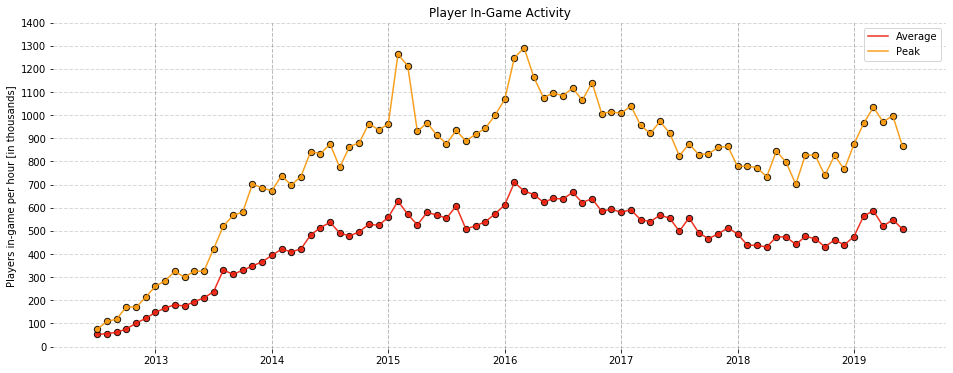

In [83]:
from project.visualisation.Charts import draw_activity_chart

draw_activity_chart(df_activity)

In [84]:
df_activity["average_activity"].median()

497068.7

It is possible to observe that average amount of players online has been raising over first two and half years of game release. Since that moment it holds on the same level of around 500 thousands of players online players per hour. The game vitality seems preety stable and lately started sligtly rising what can be explained by upcoming world championship TI 2019 in August 2019. Furthermore the game has introduced Battle Pass in May, which allows players to grind additional in-game bonuses by completing prepared subtasks and quests.

### 2. How many players are there? What part of them plays ranked matches? How many of them are professional players?

Graph saved to file: /Users/kamilkrzyk/Dev-Private/Portfolio/Projects/Dota-Analysis/images/player_count.png


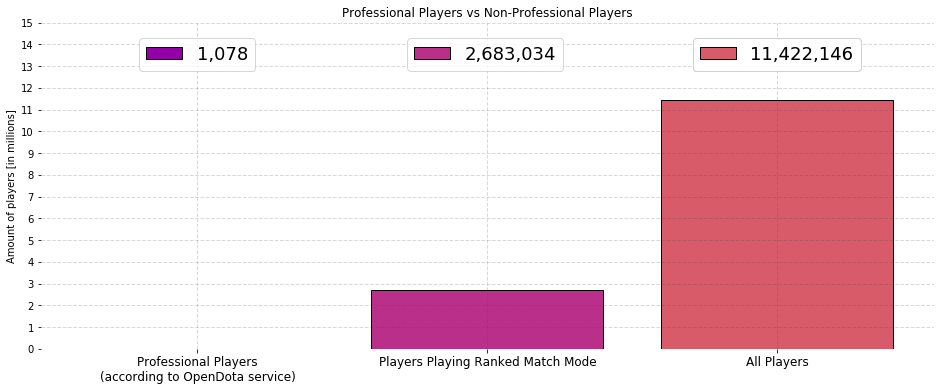

In [85]:
from project.visualisation.Charts import draw_player_count_graph

draw_player_count_graph(df_total_players, df_mmr)

In [86]:
complete_teams_num = (df_players.groupby("team_name")["account_id"].nunique() >= 5).sum()
complete_teams_num

83

In [87]:
1078/11422146

9.437806170574251e-05

In [88]:
1078/268776

0.004010774771556984

### 3. What is average MMR (Match Making Ranking) of common Dota 2 player?

Graph saved to file: /Users/kamilkrzyk/Dev-Private/Portfolio/Projects/Dota-Analysis/images/mmr.png


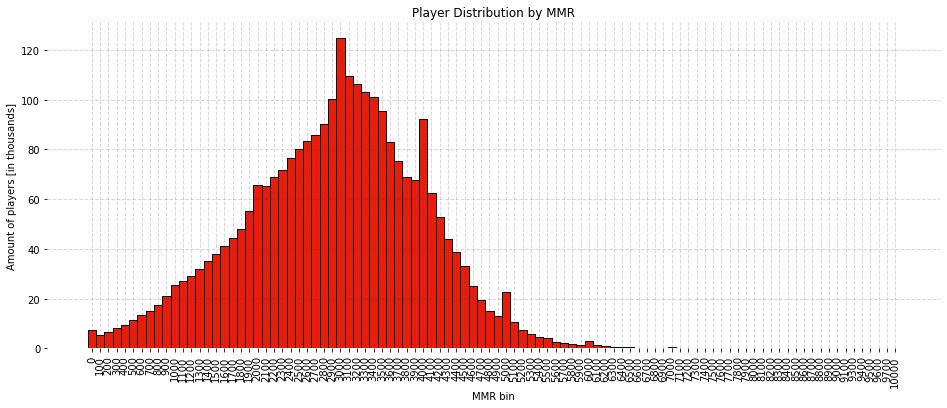

In [89]:
from project.visualisation.Charts import draw_mmr_distribution_graph

draw_mmr_distribution_graph(df_mmr)

Graph shows the MMR distribution in player group which decided to play Ranked Match mode. Interesting observation in this graph are peaks at mmr values such as 3000, 4000, 5000 and also small peaks at 2000 and 6000. This is most likely caused by the fact that people tend to climb the ladder and they set those "complete" numbers as their final goals. It is very unlikely and hard to improve the personal ranking over 2000 points in one season.

In [90]:
average_mmr = (np.sum(df_mmr["count"] * df_mmr["bin_name"])) / df_mmr["count"].sum()
average_mmr

2929.91385871368

### 4. What is average division of common Dota 2 player?

Graph saved to file: /Users/kamilkrzyk/Dev-Private/Portfolio/Projects/Dota-Analysis/images/ranks.png


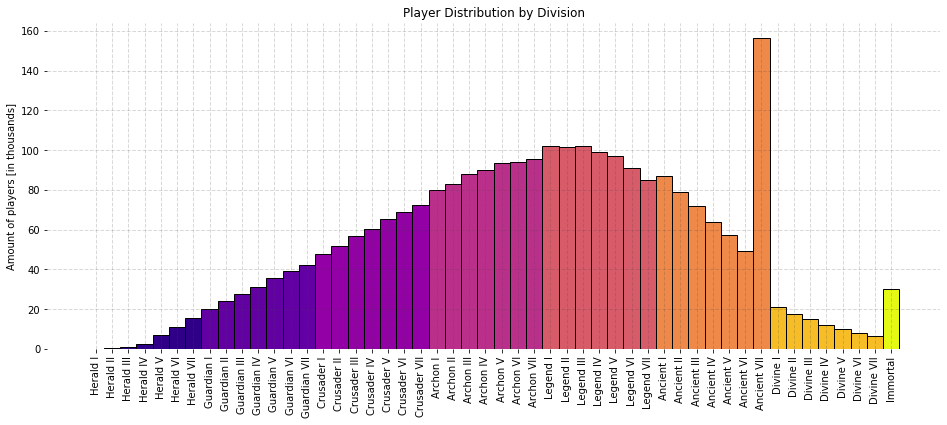

In [91]:
from project.visualisation.Charts import draw_ranks_distribution_graph

draw_ranks_distribution_graph(df_ranks)

The same MMR distribution can be translated to 8 ingame divisions, where each divisions has 7 separate level. Highest division called "Immortal" is for players that have achieved very high score and top 1000 places in ranking is displayed on the division herb.

In general each player has two kind of MMR scores - solo and team. Player division is decided based on highest MMR value.

The visible accumulation of players at Ancient VII is caused by the fact, that players cannot reach Divine division through team MMR. It has to be done alone, only through playing Solo Rank Matches.

### 5. How does professional player performance compare to average player?

Graph saved to file: /Users/kamilkrzyk/Dev-Private/Portfolio/Projects/Dota-Analysis/images/pro_player_mmr.png


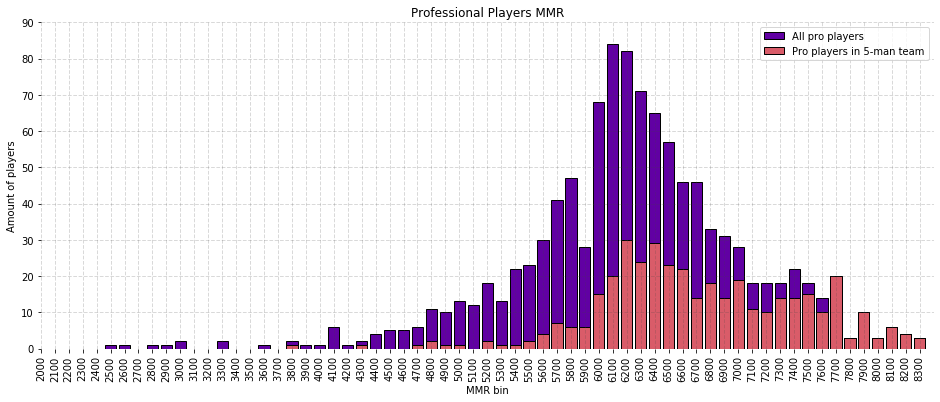

In [92]:
from project.visualisation.Charts import draw_professional_player_mmr

draw_professional_player_mmr(df_total_players)

In [93]:
df_in_team = df_total_players.loc[df_total_players["is_current_team_member"] == True]
df_in_team["mmr_estimate"].mean()

6776.684754521963

In [94]:
df_total_players.loc[~df_total_players["account_id"].isin(df_in_team["account_id"]), "mmr_estimate"].mean()

6027.976845151954

Average MMR of professional player is 6027. It is almost two times higher than average MMR of average Dota 2 player. Definition of when someone can be called professional player is unclear. There are players that earn money by teaching others to play Dota via couching sessions or streaming. Those people could be called professionals because they earn money by playing the game. It seems that for OpenDota, player is tagged as professional if he played in tournament that offers larger money prize. Still within a group of all professional players listed by OpenDota, not everyone are currently a part of complete 5-man team. Those who are currently active seems to have higher average MMR of 6777. 

### 6. How much professional players can earn from winning tournaments?

Graph saved to file: /Users/kamilkrzyk/Dev-Private/Portfolio/Projects/Dota-Analysis/images/ti_prizepool.png


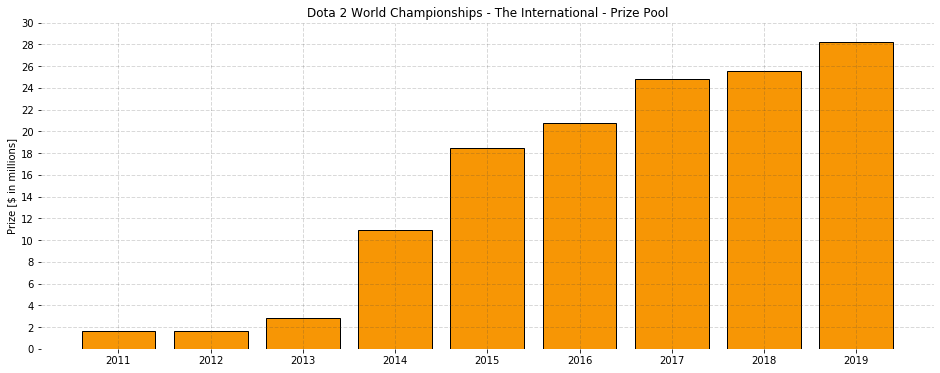

In [95]:
from project.visualisation.Charts import draw_prizepool_graph

draw_prizepool_graph(df_prizepool)

## 4.5. Automation

In steps `2. Data Understanding`, `3. Data Cleaning` I have presented the way how data was obtained, transformed and cleaned. I have also presented my thinking process and the way I look at data.

Code for fetching data and joining .jsons is not related for data analysis and presentation so it was hidden in project for readability. Problem with the rest of the code is that it doesn't follow PEP8 standards and is just raw, example code. 

The whole process of loading and cleaning data can be reproduced with single ETL script for futher automation and it usage is presented here.

In [96]:
from generate_report import etl_process

(df_players_l, df_mmr_l, df_ranks_l, df_prizepool_l, df_activity_l) = etl_process(verbose=False)

Fetching raw data...
Transforming data into pd.DataFrame format...
Cleaning data...
Saving data to files...
	- created file: /Users/kamilkrzyk/Dev-Private/Portfolio/Projects/Dota-Analysis/data/players.csv
	- created file: /Users/kamilkrzyk/Dev-Private/Portfolio/Projects/Dota-Analysis/data/mmr.csv
	- created file: /Users/kamilkrzyk/Dev-Private/Portfolio/Projects/Dota-Analysis/data/ranks.csv
	- created file: /Users/kamilkrzyk/Dev-Private/Portfolio/Projects/Dota-Analysis/data/prizepool.csv
	- created file: /Users/kamilkrzyk/Dev-Private/Portfolio/Projects/Dota-Analysis/data/activity.csv


Checking if etl_process was properly automated.

In [97]:
assert all(df_players_l == df_total_players)
assert all(df_mmr_l == df_mmr)
assert all(df_ranks_l == df_ranks)
assert all(df_prizepool_l == df_prizepool)
assert all(df_activity_l == df_activity)

### 5. Results

Clean results of this analysis can be found under following blogpost:

- https://medium.com/@krzyk.kamil/dota-2-valid-career-path-or-just-extraordinary-form-of-entertainment-91c456ea82fc